## 画像工学特論課題 2
### 1次元データのフーリエ変換
<div style="text-align: right"> エネルギー環境システム専攻修士課程1年 26213167 </div>
<div style="text-align: right"> 和田拓弥 </div>

#### (1) DFT

与えられた3つの1次元データ，Data 1, Data 2, Data 3について可視化したものを以下に示す．

In [1]:
# import library
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# read data
data1 = pd.read_csv("data1.csv", delimiter=',')
data2 = pd.read_csv("data2.csv", delimiter=',')
data3 = pd.read_csv("data3.csv", delimiter=',')

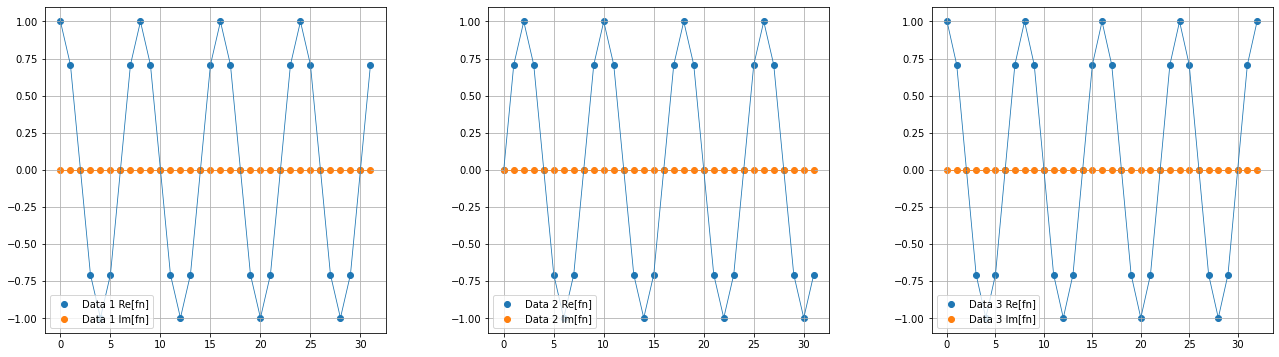

In [3]:
# graph data
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(22.0, 6.0))
plt.subplots_adjust(wspace=0.3)

axes[0].plot(data1["x_n"], data1["Re{f_n}"], linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Re{f_n}"], linewidth=0.8)
axes[2].plot(data3["x_n"], data3["Re{f_n}"], linewidth=0.8)

axes[0].scatter(data1["x_n"], data1["Re{f_n}"], label="Data 1 Re[fn]")
axes[1].scatter(data2["x_n"], data2["Re{f_n}"], label="Data 2 Re[fn]")
axes[2].scatter(data3["x_n"], data3["Re{f_n}"], label="Data 3 Re[fn]")

axes[0].plot(data1["x_n"], data1["Im{f_n}"], linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Im{f_n}"], linewidth=0.8)
axes[2].plot(data3["x_n"], data3["Im{f_n}"], linewidth=0.8)

axes[0].scatter(data1["x_n"], data1["Im{f_n}"], label="Data 1 Im[fn]")
axes[1].scatter(data2["x_n"], data2["Im{f_n}"], label="Data 2 Im[fn]")
axes[2].scatter(data3["x_n"], data3["Im{f_n}"], label="Data 3 Im[fn]")

axes[0].legend(loc='lower left', fontsize=10)
axes[1].legend(loc='lower left', fontsize=10)
axes[2].legend(loc='lower left', fontsize=10)

axes[0].grid()
axes[1].grid()
axes[2].grid()

plt.show()

Data 1, Data 2, Data 3について，これらは全て4周期ほどの周期関数であり，Data 1, Data 2はそれぞれ波長が8で位相差が90°，Data 3はData 1に1点加わり，始点と終点のデータの重複がある．

これらについて，以下で定義した離散フーリエ変換(以下DFT)を行った．

$$
F_m = \frac{1}{N}\sum_{n=0}^{N-1}f_n\exp(-i\frac{2\pi nm}{N})
$$

ここで$F_m$の実部と虚部は別々に計算し，$\exp(-i\frac{2\pi nm}{N})$ は $nm$ を $N$ で割った $N$ 通りの余りを格納した配列について，予め計算することより処理負荷を低減した．
また，波数 $k_m$ は以下のように定義した．

$$
k_m = \frac{2\pi nm}{N\Delta x}
$$

In [4]:
# define DFT function
def dft(data, mode="dft"):
    N = len(data.iloc[:, 0])
    L = (data.iloc[1, 0] - data.iloc[0, 0]) * N

    ReFm = [0] * N
    ImFm = [0] * N

    dk = 2 * np.pi / L
    km = [dk * m for m in range(N)]

    ReWp = [np.cos(2 * np.pi * n / N) for n in range(N)]
    ImWp = [np.sin(2 * np.pi * n / N) for n in range(N)]

    if mode == "dft":
        for m in range(N):
            for n in range(N):
                ReFm[m] += data.iloc[n, 1] * ReWp[(n * m) % N] + data.iloc[n, 2] * ImWp[(n * m) % N]
                ImFm[m] += -data.iloc[n, 1] * ImWp[(n * m) % N] + data.iloc[n, 2] * ReWp[(n * m) % N]
            ReFm[m] /= N
            ImFm[m] /= N

    elif mode == "idft":
        for m in range(N):
            for n in range(N):
                ReFm[m] += data.iloc[n, 1] * ReWp[(n * m) % N] - data.iloc[n, 2] * ImWp[(n * m) % N]
                ImFm[m] += data.iloc[n, 1] * ImWp[(n * m) % N] + data.iloc[n, 2] * ReWp[(n * m) % N]

    return km, ReFm, ImFm

In [5]:
# DFT calculation
km1, ReFm1, ImFm1 = dft(data1)
km2, ReFm2, ImFm2 = dft(data2)
km3, ReFm3, ImFm3 = dft(data3)

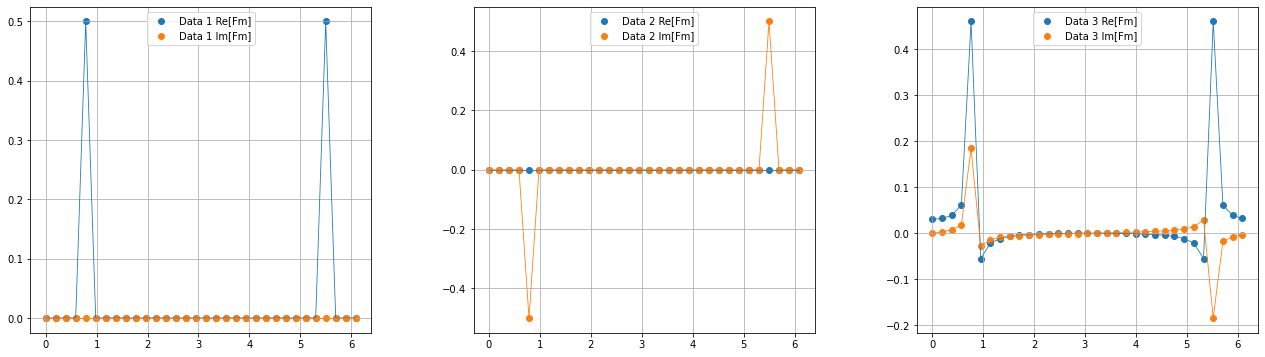

In [6]:
# graph DFT results
fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(22.0, 6.0))
plt.subplots_adjust(wspace=0.3)

axes[0].plot(km1, ReFm1, linewidth=0.8)
axes[1].plot(km2, ReFm2, linewidth=0.8)
axes[2].plot(km3, ReFm3, linewidth=0.8)

axes[0].scatter(km1, ReFm1, label="Data 1 Re[Fm]")
axes[1].scatter(km2, ReFm2, label="Data 2 Re[Fm]")
axes[2].scatter(km3, ReFm3, label="Data 3 Re[Fm]")

axes[0].plot(km1, ImFm1, linewidth=0.8)
axes[1].plot(km2, ImFm2, linewidth=0.8)
axes[2].plot(km3, ImFm3, linewidth=0.8)

axes[0].scatter(km1, ImFm1, label="Data 1 Im[Fm]")
axes[1].scatter(km2, ImFm2, label="Data 2 Im[Fm]")
axes[2].scatter(km3, ImFm3, label="Data 3 Im[Fm]")

axes[0].legend(loc='upper center', fontsize=10)
axes[1].legend(loc='upper center', fontsize=10)
axes[2].legend(loc='upper center', fontsize=10)

axes[0].grid()
axes[1].grid()
axes[2].grid()

plt.show()

上図はそれぞれのデータに対するDFTの結果を示したグラフである．
Data 1, Data 2の結果を比べた際，ともに $k_m = 0.79, 5.50$ にピークを有する結果が得られた．ピーク値については正負の違いはあるものの，ともに大きさ0.5のピークを有する．
この結果から，Data 1とData 2が同じ周期性を有することがわかる．

データの周期性について，偶関数であれば実部に正のピークが，奇関数であれば虚部に正負の異なるピークが表れる結果が得られるが，単にデータの周期性を判断する際には，$k_m < \frac{k_N}{2}$ の範囲において，以下で定義されるパワースペクトルに注目すれば十分である．

$$
S(k) = {\mathrm{Re}[F_m]}^2 + {\mathrm{Im}[F_m]}^2
$$

データの重複があるData 3については，$N\Delta x$ が周期の整数倍と一致しないため，ピーク近傍に誤差としてその影響が表れている．

#### (2) 逆DFT

Data 2に関するDFTの結果に対して，以下で定義した逆フーリエ変換(以下IDFT)を行った．なおプログラムは先程のDFTの計算過程で既に実装している．

$$
f_n = \sum_{n=0}^{N-1}F_m\exp(i\frac{2\pi nm}{N})
$$

$$
x_n = \frac{2\pi n}{N\Delta k}
$$

In [7]:
# set Data 2 DFT result
data2_DFT = pd.DataFrame(
    {'k_m': km2,
     'Re{F_m}': ReFm2,
     'Im{F_m}': ImFm2}
)

# IDFT calculation
xn2, Refn2, Imfn2 = dft(data2_DFT, mode="idft")

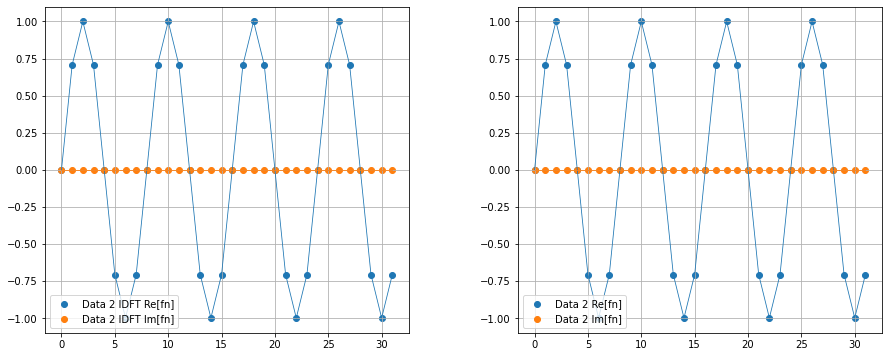

In [8]:
# graph IDFT result
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15.0, 6.0))
plt.subplots_adjust(wspace=0.3)

axes[0].plot(xn2, Refn2, linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Re{f_n}"], linewidth=0.8)

axes[0].scatter(xn2, Refn2, label="Data 2 IDFT Re[fn]")
axes[1].scatter(data2["x_n"], data2["Re{f_n}"], label="Data 2 Re[fn]")

axes[0].plot(xn2, Imfn2, linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Im{f_n}"], linewidth=0.8)

axes[0].scatter(xn2, Imfn2, label="Data 2 IDFT Im[fn]")
axes[1].scatter(data2["x_n"], data2["Im{f_n}"], label="Data 2 Im[fn]")

axes[0].legend(loc='lower left', fontsize=10)
axes[1].legend(loc='lower left', fontsize=10)

axes[0].grid()
axes[1].grid()

plt.show()

上図の結果は，Data2についてIDFTを行った結果と元のデータを示したものである．
上図より元の周期関数が再現されたことがわかる．

#### (3) DFTを用いた補間

上記のData 2にDFTしたものを，さらにIDFTにより内部補間した結果を示す．ここで補間後の実空間のデータ数は条件より元のデータ数32の4倍である128である．

サンプリング定理から波数 $k_m$ について，

$$
k_m \leq \frac{\pi}{\Delta x}
$$

今回は補間により $\Delta x$ が $\frac{1}{4}$ 倍となることから $k_m$ も4倍にする必要がある．
ここで波数空間は実空間とは異なりピークが立つ位置，すなわち波数自体の値に意味がある．故に必要な波数成分を残しつつ，高周波側にゼロの値を持つ配列を作成することでこれを達成した．
具体的な配列操作については，元の波数配列について中央に必要格納数を満たす配列を新たに追加した．

In [9]:
# define DFT interpolation function
def dft_interpolate(data):
    N = len(data.iloc[:, 0]) * 4
    dx = data.iloc[1, 0] - data.iloc[0, 0]

    xn = np.linspace(data.iloc[0, 0], data.iloc[-1, 0] + dx, N + 1)[:-1]

    Refn = [0] * N
    Imfn = [0] * N

    _ReFm2 = [0] * N
    _ImFm2 = [0] * N

    ReWp = [np.cos(2 * np.pi * n / N) for n in range(N)]
    ImWp = [np.sin(2 * np.pi * n / N) for n in range(N)]

    _, _ReFm, _ImFm = dft(data)

    _ReFm2[:int(N / 4 / 2)], _ReFm2[N - int(N / 4 / 2):] = _ReFm[:int(N / 4 / 2)], _ReFm[int(N / 4 / 2):]
    _ImFm2[:int(N / 4 / 2)], _ImFm2[N - int(N / 4 / 2):] = _ImFm[:int(N / 4 / 2)], _ImFm[int(N / 4 / 2):]

    for m in range(N):
        for n in range(N):
            Refn[m] += _ReFm2[n] * ReWp[(n * m) % N] - _ImFm2[n] * ImWp[(n * m) % N]
            Imfn[m] += _ReFm2[n] * ImWp[(n * m) % N] + _ImFm2[n] * ReWp[(n * m) % N]

    return xn, Refn, Imfn

In [10]:
# DFT interpolation
xn2_i, Refn2_i, Imfn2_i = dft_interpolate(data2)

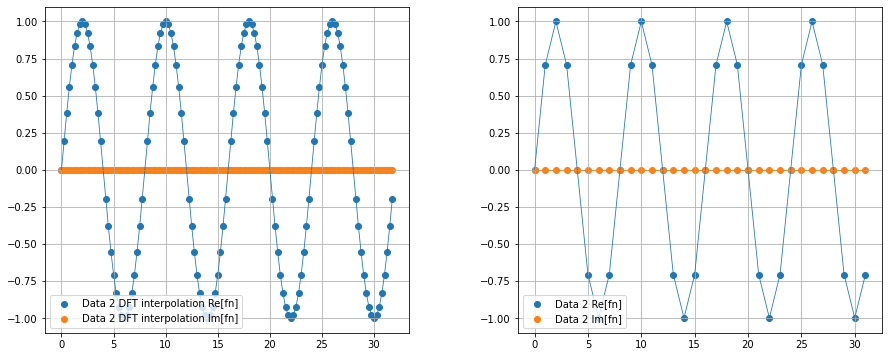

In [11]:
# graph DFT interpolation result
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15.0, 6.0))
plt.subplots_adjust(wspace=0.3)

axes[0].plot(xn2_i, Refn2_i, linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Re{f_n}"], linewidth=0.8)

axes[0].scatter(xn2_i, Refn2_i, label="Data 2 DFT interpolation Re[fn]")
axes[1].scatter(data2["x_n"], data2["Re{f_n}"], label="Data 2 Re[fn]")

axes[0].plot(xn2_i, Imfn2_i, linewidth=0.8)
axes[1].plot(data2["x_n"], data2["Im{f_n}"], linewidth=0.8)

axes[0].scatter(xn2_i, Imfn2_i, label="Data 2 DFT interpolation Im[fn]")
axes[1].scatter(data2["x_n"], data2["Im{f_n}"], label="Data 2 Im[fn]")

axes[0].legend(loc='lower left', fontsize=10)
axes[1].legend(loc='lower left', fontsize=10)

axes[0].grid()
axes[1].grid()

plt.show()